## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Imports relevant libraries. 
from splinter import Browser               # Provides interface for automated online browsing. 
from bs4 import BeautifulSoup              # Enables parsing of HTML code by identifying CSS selectors. 
import matplotlib.pyplot as plt            # Assists with visualising plots.
import pandas as pd                        # Helps store and manipulate data within DataFrames.
import csv                                 # Assists with writting to a CSV file upon export.

In [2]:
# Sets up which browser spliter will be enabled on. 
browser = Browser('chrome')

### Step 1: Visits the Website

The website visited displays a table of Mars Temperature Data. Once familiarised with, the website was inspected using Chrome DevTools (to access right click on the webpage > inspect).

The purpose of this deliverable is to scrape the table values and to convert these into a DataFrame ready for analysis, without the use of pd.read_html. Therefore, the following elements have been identified as being relevant for this web scrape. 
<li> div | class = "container-fluid" [the main area which stores all the information of interest]</li> 
<li> tr | class = "data-row" [contains each of the table's row elements e.g. id, terrenstrial_date of interest which can be iterated through for each article]</li>
<li> td [Within each tr row, there are multiple td's which contains each column's value between tags]</li>



In [3]:
# Visit the Mars Temperature Data website.
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrapes the Table

Despite being able to read the table of interest straight into a DataFrame using pd.read_html, a Beautiful Soup object has been created to scrape information from the HTML table.

In [4]:
# Extracts html string from Mars Temperature Data.
html = browser.html

# Creates a Beautiful Soup object.
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data.

# Extracts the main area identified earlier to contain the elements required. 
main_area = soup.find("div", class_="container-fluid")

# Extracts the rows existent in the main area which were identified earlier to contain the required columns. 
rows = main_area.find_all("tr", class_="data-row")

# Outputs the Mars Temperature Data table row divisions.
print("Mars Temperature Data Table Row Divisions:")
rows

Mars Temperature Data Table Row Divisions:


[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assembles the scraped data into a Pandas DataFrame. The columns will be as outlined below:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Creates an empty list to store all the Table's data within (list of rows).
mars_temperature_data = []

# Loops through each row division.
for row in rows:
    # Finds all the column values for the current row division being iterated.
    all_columns = row.find_all('td')
    # Stores a list of all the text results obtained in the list comprehension which loops through each of the column values 
    # for the observed row division (list of columns). 
    column_values = [column.text for column in all_columns]

    # Appends mars_temperature_data with the list of each row divisions' column values. 
    mars_temperature_data.append(column_values)
    
mars_temperature_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Creates a Pandas DataFrame by using the list of rows and a list of the column names.
df = pd.DataFrame(mars_temperature_data, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

# Confirms the DataFrame was created successfully.
df .head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepares Data for Analysis

The data types of each column are examined and converted to the appropritate data types so that analysis can proceed. 

In [8]:
# Examines the data types of each column.
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Changes the data types for data analysis.
# Converts (id, sol, ls, month) columns to integers, (min_temp, and pressure) to floats. 
df = df.astype({"id": int, 
                "sol": int, 
                "ls": int, 
                "month": int, 
                "min_temp": float, 
                "pressure": float
               }, errors = "raise")
# Converts terrestrial_date from a object to a datetime datatype. 
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])

In [10]:
# Confirms that the data type changes were successful.
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyzes the Data

Analyzes the dataset using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
# 1. How many months are there on Mars?
no_months = df["month"].nunique()
no_months

12

In [12]:
# 2. How many Martian days' worth of data are there?
martian_days = df["sol"].count()
martian_days

1867

In [13]:
# 3. What is the average low temperature by month?
average_low = df.groupby(["month"])
average_low = average_low[["min_temp"]].mean()
average_low

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


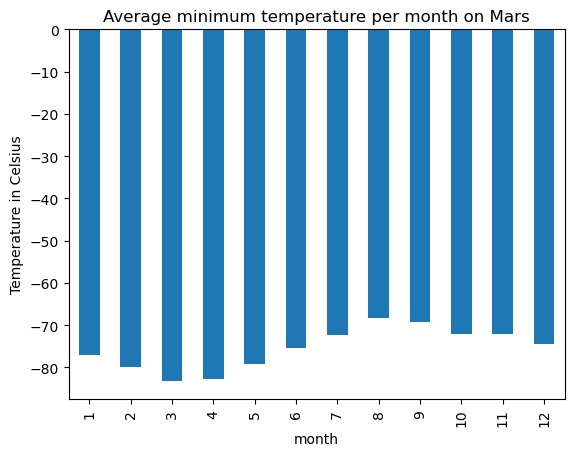

In [14]:
# Plot the average temperature by month
average_low_plot = average_low.plot(kind = "bar", 
                                    title = "Average minimum temperature per month on Mars", 
                                    xlabel = "month",
                                    ylabel = "Temperature in Celsius",
                                    legend = False)
plt.show()

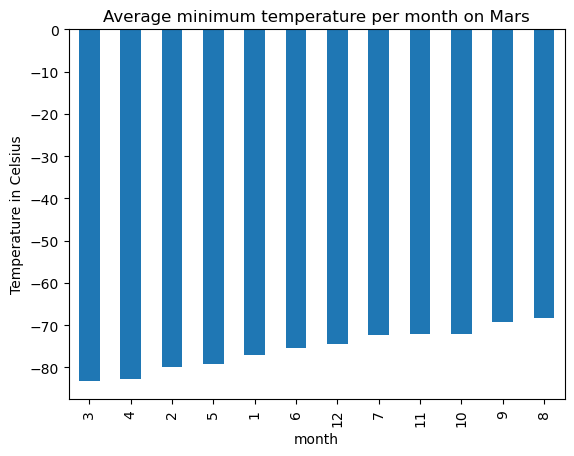

On average, the coldest month was month number 3.
On average, the hottest month was month number 8.


In [15]:
# Identify the coldest and hottest months in Curiosity's location
average_low = average_low.sort_values("min_temp")

average_low_plot = average_low.plot(kind = "bar", 
                                    title = "Average minimum temperature per month on Mars", 
                                    xlabel = "month",
                                    ylabel = "Temperature in Celsius",
                                    legend = False)
plt.show()

print("On average, the coldest month was month number 3.")
print("On average, the hottest month was month number 8.")

In [16]:
# 4. Average pressure by Martian month
average_pressure = df.groupby(["month"])
average_pressure = average_pressure[["pressure"]].mean()
average_pressure = average_pressure.sort_values("pressure")
average_pressure

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


On average, the month number 6 had the lowest athmospheric pressure.
On average, the month number 9 had the highest athmospheric pressure.


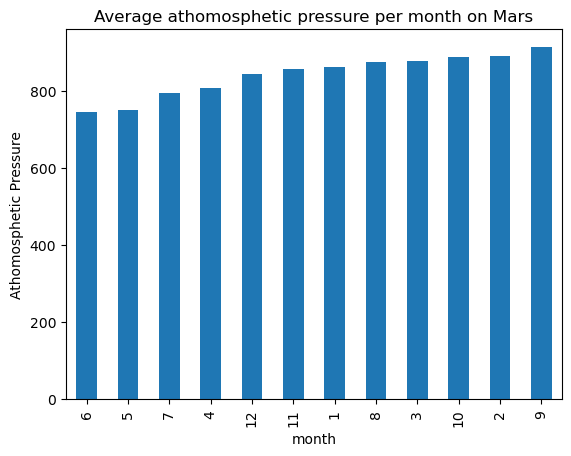

In [17]:
# Plot the average pressure by month
average_pressure = average_pressure.plot(kind = "bar", 
                                    title = "Average athomosphetic pressure per month on Mars", 
                                    xlabel = "month",
                                    ylabel = "Athomosphetic Pressure",
                                    legend = False)

print("On average, the month number 6 had the lowest athmospheric pressure.")
print("On average, the month number 9 had the highest athmospheric pressure.")

In [18]:
# 5. How many terrestrial (earth) days are there in a Martian year?
terrestrial_days = df[["sol", "min_temp"]]
terrestrial_days = terrestrial_days.set_index("sol")
terrestrial_days 

,min_temp
sol,
10,-75.0
11,-76.0
12,-76.0
13,-74.0
14,-74.0
...,...
1973,-78.0
1974,-77.0
1975,-76.0


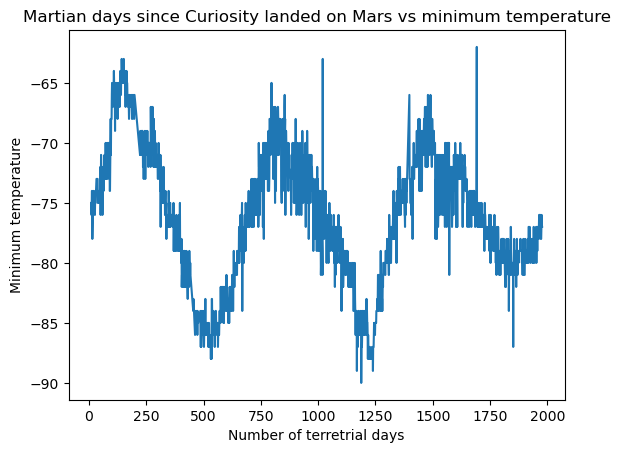

In [19]:
terrestrial_days = terrestrial_days.plot(
                                    title = "Martian days since Curiosity landed on Mars vs minimum temperature", 
                                    xlabel = "Number of terretrial days",
                                    ylabel = "Minimum temperature",
                                    legend = False)

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Saves the Data

Exports the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
df.to_csv('mars_temperature_data.csv', sep=',', index=False, encoding='utf-8')

In [21]:
browser.quit()